In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inr-foreign-exchange-rate-2006-2023/ForEx Rates 2000.csv
/kaggle/input/inr-foreign-exchange-rate-2006-2023/ForEx Rates 2006.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from datetime import date
import time
import datetime as dt

import random
import math

from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
#!pip install pmdarima
#from pmdarima import auto_arima

from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
from torch.autograd import Variable
from fastprogress import progress_bar

In [3]:
tab = pd.read_csv('/kaggle/input/inr-foreign-exchange-rate-2006-2023/ForEx Rates 2006.csv')

In [4]:
tab

,Date,USD,AUS,CAN,SWF,DKK,EUR,GBP,HKD,IDR,...,ISK,MXN,PHP,PKR,PLN,RUB,SAR,TRY,VEF,BHD
0,2023-08-31,82.702,53.615,61.211,93.607,12.0314,89.6570,104.808,10.5460,0.005426,...,0.6303,4.8485,1.4601,0.2697,20.03,0.8628,22.05,3.09,2.57,219.3620
1,2023-08-30,82.607,53.496,61.032,94.053,12.1057,90.2400,105.060,10.5259,0.005433,...,0.6324,4.9312,1.4549,0.2714,20.18,0.8591,22.02,3.09,2.57,219.0930
2,2023-08-29,82.574,53.491,60.913,93.984,12.0527,89.8240,104.390,10.5231,0.005427,...,0.6314,4.9142,1.4548,0.2712,20.11,0.8653,22.01,3.11,2.52,219.0060
3,2023-08-28,82.600,53.104,60.735,93.439,11.9889,89.3480,104.101,10.5275,0.005421,...,0.6273,4.9167,1.4565,0.2724,19.99,0.8740,22.02,3.12,2.54,219.0750
4,2023-08-25,82.637,52.888,60.727,93.386,11.9679,89.2480,103.933,10.5353,0.005405,...,0.6261,4.9291,1.4596,0.2727,19.96,0.8698,22.03,3.11,2.54,219.1670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4604,2006-01-06,44.320,33.424,38.031,34.894,7.2225,55.1075,77.743,5.7162,NaN,...,NaN,4.1964,NaN,NaN,14.15,1.5459,11.82,33.35,NaN,117.5830
4605,2006-01-05,44.600,33.332,38.374,34.945,7.2347,54.8770,77.651,5.7520,NaN,...,NaN,4.1957,NaN,NaN,14.17,1.5556,11.89,33.42,NaN,118.3225
4606,2006-01-04,44.705,33.394,38.915,35.014,7.2613,54.7210,77.555,5.7604,NaN,...,NaN,4.2256,NaN,NaN,14.23,1.5554,11.92,33.52,NaN,118.4985
4607,2006-01-03,44.965,33.272,38.899,34.828,7.2410,55.0160,77.340,5.7992,NaN,...,NaN,4.2279,NaN,NaN,14.12,1.5645,11.99,33.48,NaN,119.2915


In [5]:
print("Number of records:", len(tab))
print(f"Number of days between {date(2006, 1, 1)} and {date(2023, 8, 31)}: {(date(2023, 8, 31) - date(2006, 1, 1)).days}")
print(f'Percentage Data available: {round(100*len(tab)/((date(2023, 8, 31) - date(2006, 1, 1)).days), 2)}')

Number of records: 4609
Number of days between 2006-01-01 and 2023-08-31: 6451
Percentage Data available: 71.45


In [6]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4609 entries, 0 to 4608
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4609 non-null   object 
 1   USD     4609 non-null   float64
 2   AUS     4609 non-null   float64
 3   CAN     4609 non-null   float64
 4   SWF     4609 non-null   float64
 5   DKK     4609 non-null   float64
 6   EUR     4609 non-null   float64
 7   GBP     4609 non-null   float64
 8   HKD     4609 non-null   float64
 9   IDR     4237 non-null   float64
 10  JPY     4609 non-null   float64
 11  KRW     4155 non-null   float64
 12  MYR     4608 non-null   float64
 13  NOK     4609 non-null   float64
 14  NZD     4609 non-null   float64
 15  SEK     4609 non-null   float64
 16  SGD     4609 non-null   float64
 17  THB     4609 non-null   float64
 18  TWD     4609 non-null   float64
 19  ZAR     4609 non-null   float64
 20  AED     4609 non-null   float64
 21  ARS     4609 non-null   float64
 22  

In [7]:
tab.sort_values('Date', inplace = True)

In [8]:
tab['Date'] = pd.to_datetime(tab['Date'])
tab = tab.set_index('Date')
#tab.head()

In [9]:
empty_cols = [col for col in tab.columns if 100*tab[col].isnull().sum()/len(tab) > 8]
print(empty_cols)
print(100*tab[empty_cols].isnull().sum()/len(tab))

['IDR', 'KRW', 'ILS', 'ISK', 'PHP', 'VEF']
IDR     8.071165
KRW     9.850293
ILS    22.477761
ISK    22.477761
PHP    22.477761
VEF    99.522673
dtype: float64


In [10]:
tab.drop('VEF', axis = 1, inplace = True)

In [11]:
df = tab.copy()
df

,USD,AUS,CAN,SWF,DKK,EUR,GBP,HKD,IDR,JPY,...,ILS,ISK,MXN,PHP,PKR,PLN,RUB,SAR,TRY,BHD
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-02,45.075,33.047,38.659,34.303,7.1437,54.9435,77.160,5.8131,NaN,0.3679,...,NaN,NaN,4.2359,NaN,NaN,13.80,1.5683,12.02,33.36,119.5655
2006-01-03,44.965,33.272,38.899,34.828,7.2410,55.0160,77.340,5.7992,NaN,0.3679,...,NaN,NaN,4.2279,NaN,NaN,14.12,1.5645,11.99,33.48,119.2915
2006-01-04,44.705,33.394,38.915,35.014,7.2613,54.7210,77.555,5.7604,NaN,0.3678,...,NaN,NaN,4.2256,NaN,NaN,14.23,1.5554,11.92,33.52,118.4985
2006-01-05,44.600,33.332,38.374,34.945,7.2347,54.8770,77.651,5.7520,NaN,0.3639,...,NaN,NaN,4.1957,NaN,NaN,14.17,1.5556,11.89,33.42,118.3225
2006-01-06,44.320,33.424,38.031,34.894,7.2225,55.1075,77.743,5.7162,NaN,0.3625,...,NaN,NaN,4.1964,NaN,NaN,14.15,1.5459,11.82,33.35,117.5830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-25,82.637,52.888,60.727,93.386,11.9679,89.2480,103.933,10.5353,0.005405,56.4306,...,21.70,0.6261,4.9291,1.4596,0.2727,19.96,0.8698,22.03,3.11,219.1670
2023-08-28,82.600,53.104,60.735,93.439,11.9889,89.3480,104.101,10.5275,0.005421,56.3630,...,21.70,0.6273,4.9167,1.4565,0.2724,19.99,0.8740,22.02,3.12,219.0750
2023-08-29,82.574,53.491,60.913,93.984,12.0527,89.8240,104.390,10.5231,0.005427,56.6002,...,21.79,0.6314,4.9142,1.4548,0.2712,20.11,0.8653,22.01,3.11,219.0060


In [12]:
df = df.interpolate(method = 'bfill')
df.isnull().sum()

USD    0
AUS    0
CAN    0
SWF    0
DKK    0
EUR    0
GBP    0
HKD    0
IDR    0
JPY    0
KRW    0
MYR    0
NOK    0
NZD    0
SEK    0
SGD    0
THB    0
TWD    0
ZAR    0
AED    0
ARS    0
BRL    0
CNY    0
HUF    0
ILS    0
ISK    0
MXN    0
PHP    0
PKR    0
PLN    0
RUB    0
SAR    0
TRY    0
BHD    0
dtype: int64

In [13]:
df.head()

,USD,AUS,CAN,SWF,DKK,EUR,GBP,HKD,IDR,JPY,...,ILS,ISK,MXN,PHP,PKR,PLN,RUB,SAR,TRY,BHD
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-02,45.075,33.047,38.659,34.303,7.1437,54.9435,77.160,5.8131,0.4759,0.3679,...,12.34,0.3777,4.2359,1.0137,0.5587,13.80,1.5683,12.02,33.36,119.5655
2006-01-03,44.965,33.272,38.899,34.828,7.2410,55.0160,77.340,5.7992,0.4759,0.3679,...,12.34,0.3777,4.2279,1.0137,0.5587,14.12,1.5645,11.99,33.48,119.2915
2006-01-04,44.705,33.394,38.915,35.014,7.2613,54.7210,77.555,5.7604,0.4759,0.3678,...,12.34,0.3777,4.2256,1.0137,0.5587,14.23,1.5554,11.92,33.52,118.4985
2006-01-05,44.600,33.332,38.374,34.945,7.2347,54.8770,77.651,5.7520,0.4759,0.3639,...,12.34,0.3777,4.1957,1.0137,0.5587,14.17,1.5556,11.89,33.42,118.3225
2006-01-06,44.320,33.424,38.031,34.894,7.2225,55.1075,77.743,5.7162,0.4759,0.3625,...,12.34,0.3777,4.1964,1.0137,0.5587,14.15,1.5459,11.82,33.35,117.5830


<Axes: xlabel='Date'>

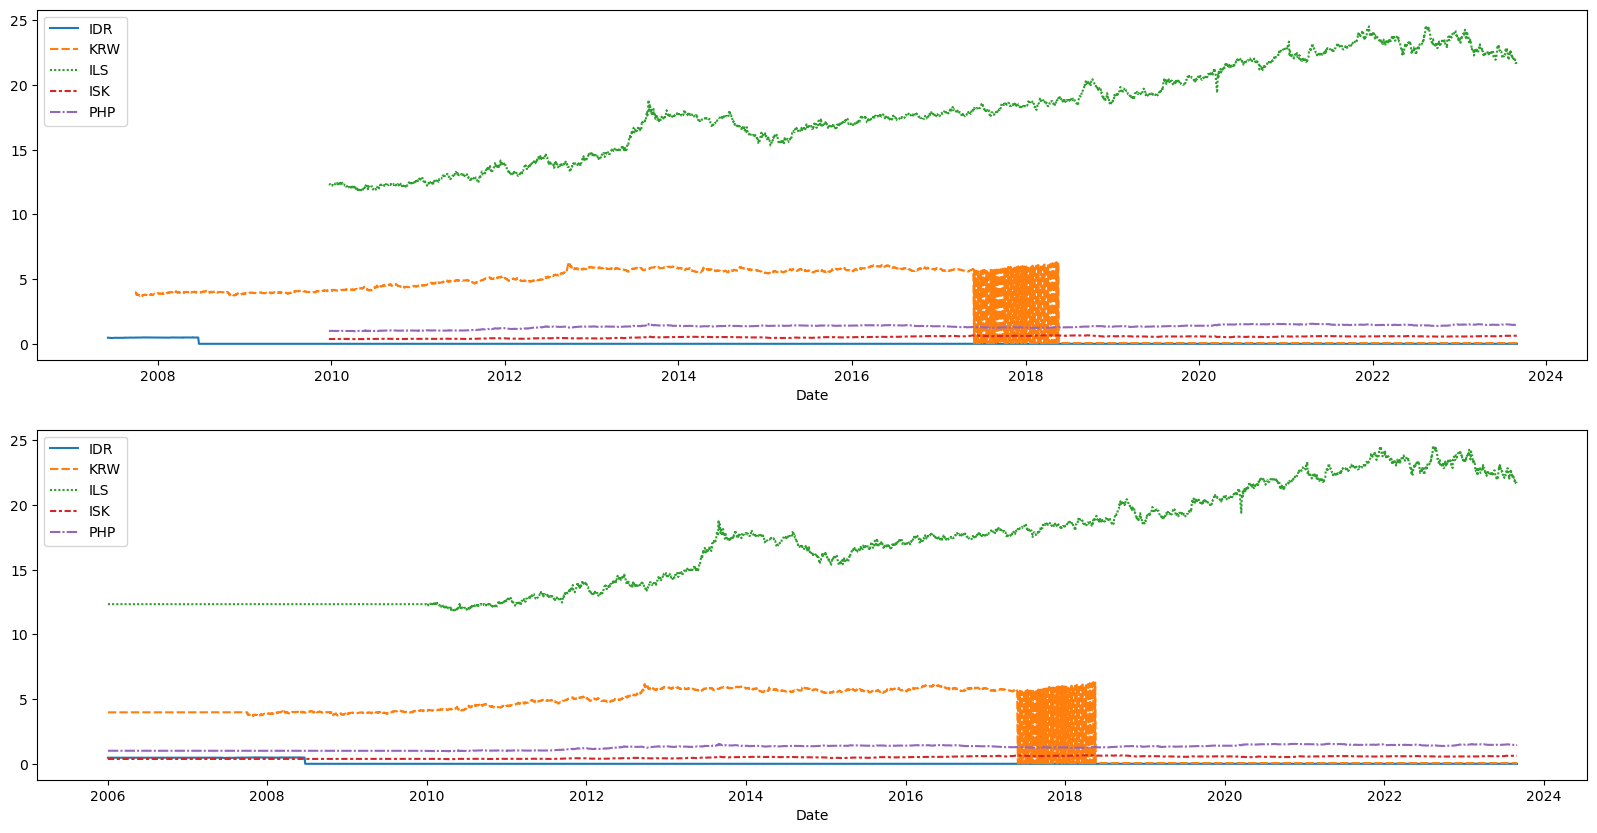

In [14]:
empty_cols.remove('VEF')

rows, cols = 2, 1
fig, ax = plt.subplots(rows, cols, figsize=(20,rows*5))

sns.lineplot(tab[empty_cols], ax = ax[0])
sns.lineplot(df[empty_cols], ax = ax[1])

<Axes: xlabel='Date'>

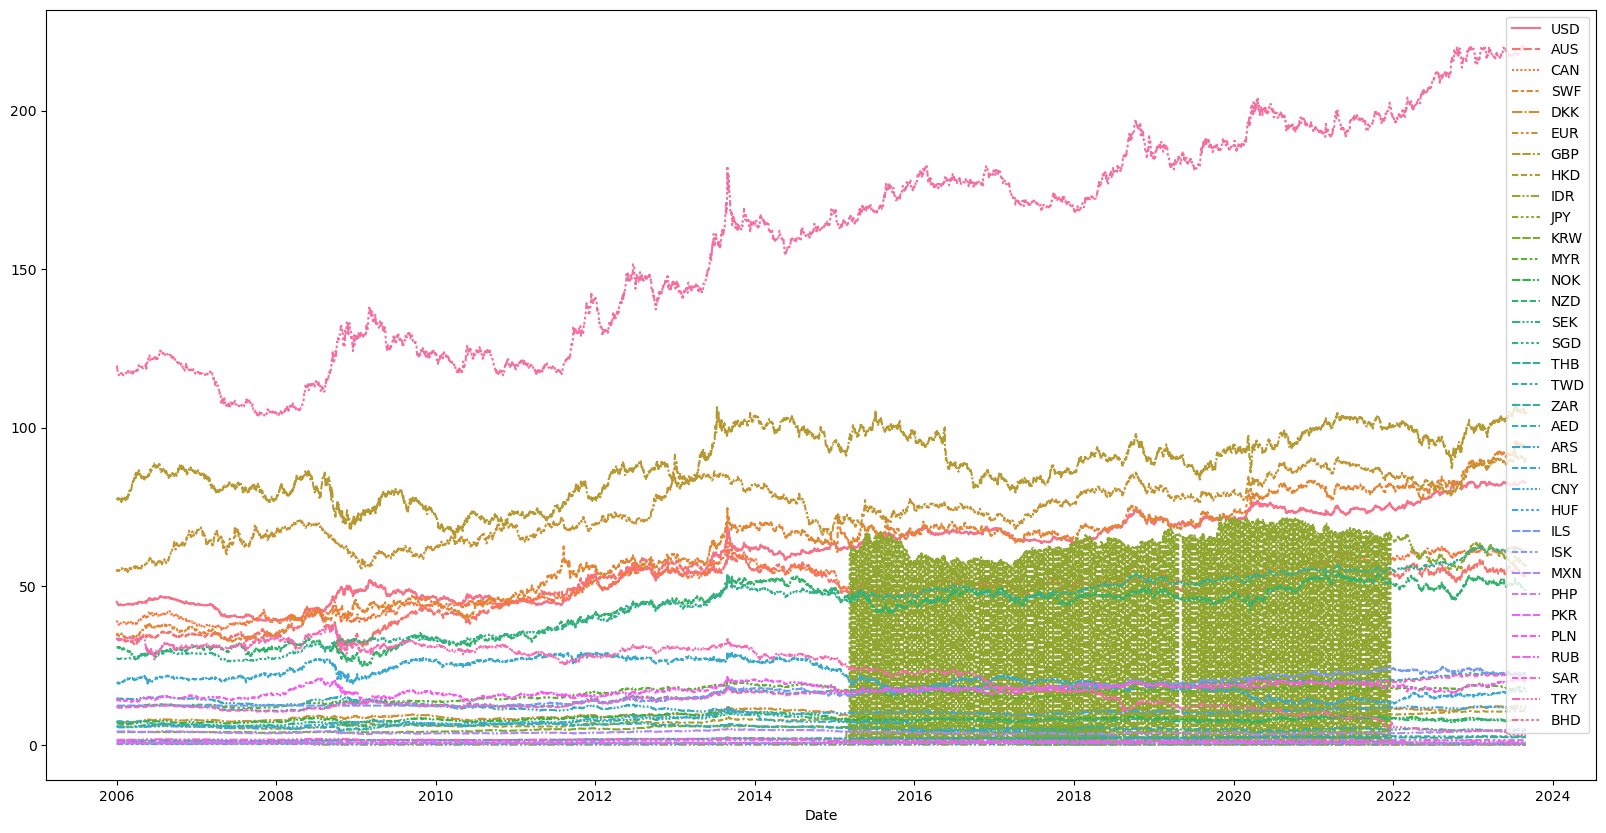

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
sns.lineplot(df[:])

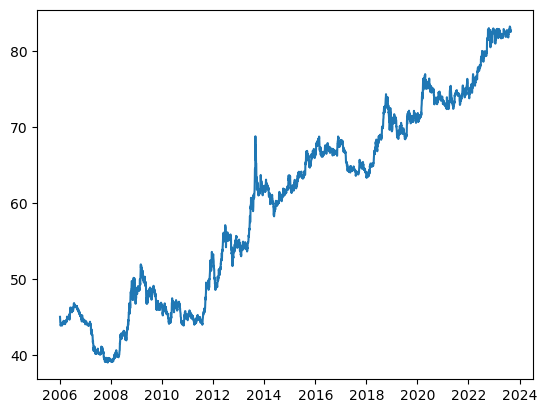

In [16]:
name = 'USD'
plt.plot(df[name])
plt.show()

In [17]:
data = pd.DataFrame(df[name])
data.head()

,USD
Date,
2006-01-02,45.075
2006-01-03,44.965
2006-01-04,44.705
2006-01-05,44.600
2006-01-06,44.320


In [18]:
def check_stationarity(series):
    
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")
        
check_stationarity(data[name])

ADF Statistic: -0.122109
p-value: 0.947191
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Non-stationary


ADF Statistic: -28.733837
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary


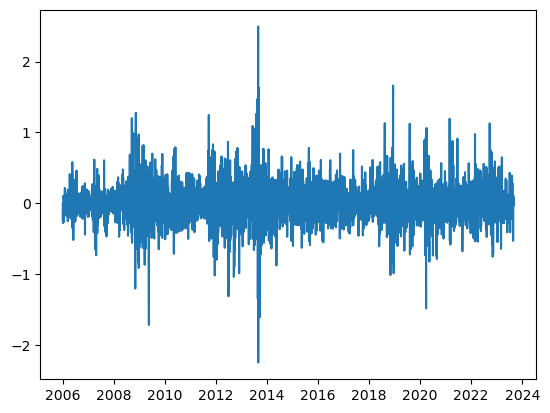

In [19]:
data['diff'] = data[name].diff().fillna(0)
check_stationarity(data['diff'])
plt.plot(data['diff'])
plt.show()

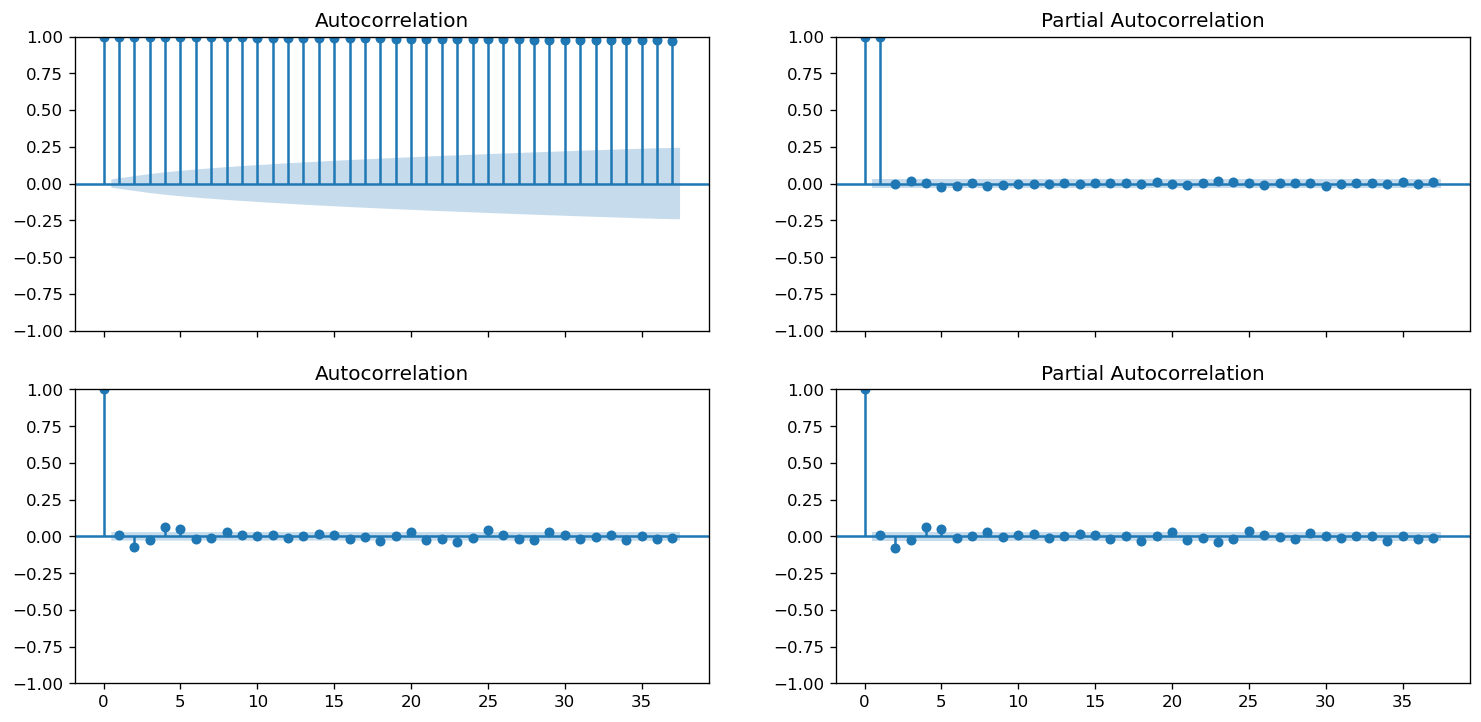

In [20]:
plt.rcParams.update({'figure.figsize':(15,7), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=True)
plot_acf(data[name], ax=axes[0, 0])
plot_pacf(data[name], ax = axes[0, 1])

plot_acf(data['diff'], ax=axes[1, 0])
plot_pacf(data['diff'], ax=axes[1, 1])
plt.show()

In [21]:
print('Stationary after differencing - d = 1')
print('Spike in pacf AR - p = 2')
print('Spike in acf MA - q = 2')

Stationary after differencing - d = 1
Spike in pacf AR - p = 2
Spike in acf MA - q = 2


In [22]:
#auto_arima(data[name], seasonal=False, max_p=4, max_d=3,max_q=4, max_P=4, max_D=4,max_Q=4).summary()

In [23]:
model = ARIMA(data[name], order = (2,1,2))
model_fit = model.fit()
print(model_fit.summary())

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    USD   No. Observations:                 4609
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -291.269
Date:                Mon, 18 Sep 2023   AIC                            592.538
Time:                        12:13:28   BIC                            624.715
Sample:                    01-02-2006   HQIC                           603.862
                         - 08-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2431      0.053      4.582      0.000       0.139       0.347
ar.L2         -0.6323      0.062    -10.245      0.000      -0.753      -0.511
ma.L1         -0.2340      0.057     -4.122      0.0

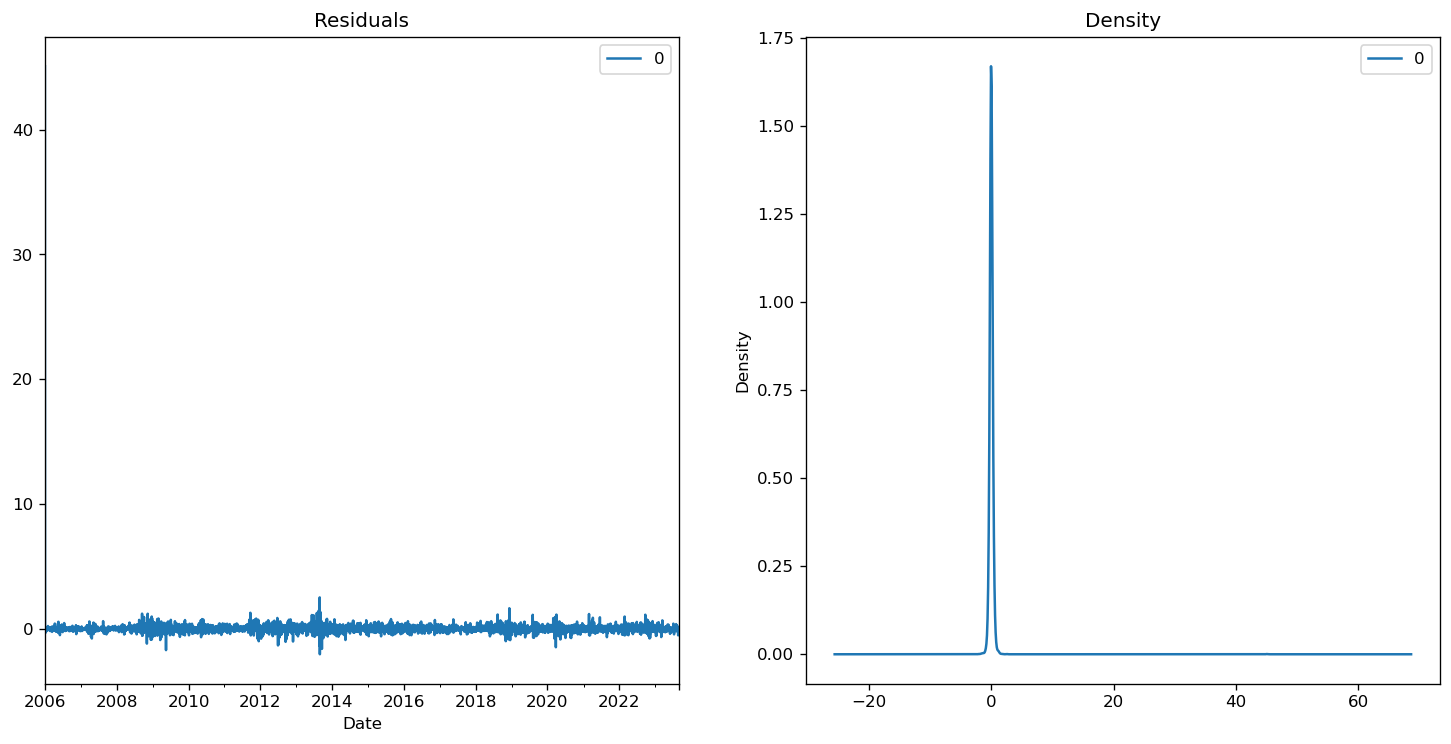

In [24]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

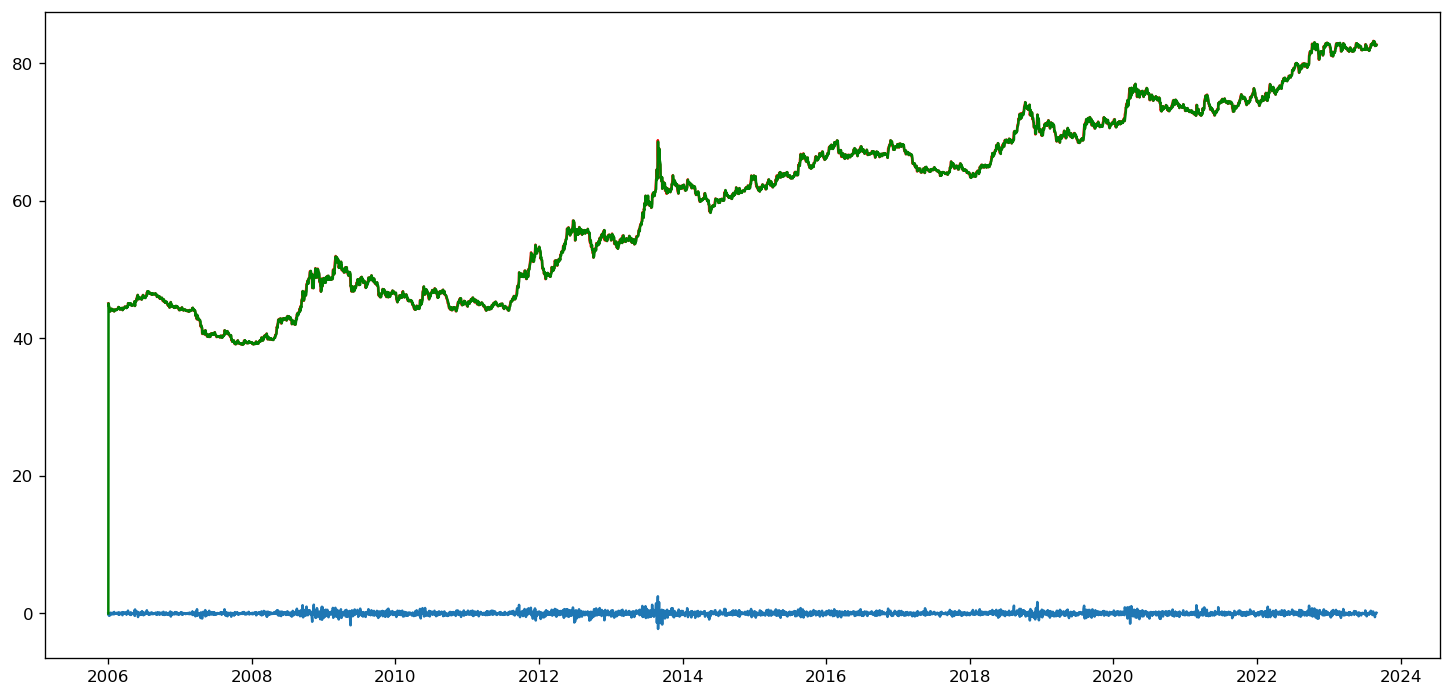

In [25]:
plt.plot(data['diff'])
plt.plot(data[name], color = 'red')
plt.plot(model_fit.fittedvalues, color = 'green')
plt.show()

In [26]:
model_fit.fittedvalues

Date
2006-01-02     0.000000
2006-01-03    45.075000
2006-01-04    44.963881
2006-01-05    44.711525
2006-01-06    44.624017
                ...    
2023-08-25    82.628781
2023-08-28    82.642183
2023-08-29    82.569362
2023-08-30    82.566764
2023-08-31    82.624599
Length: 4609, dtype: float64

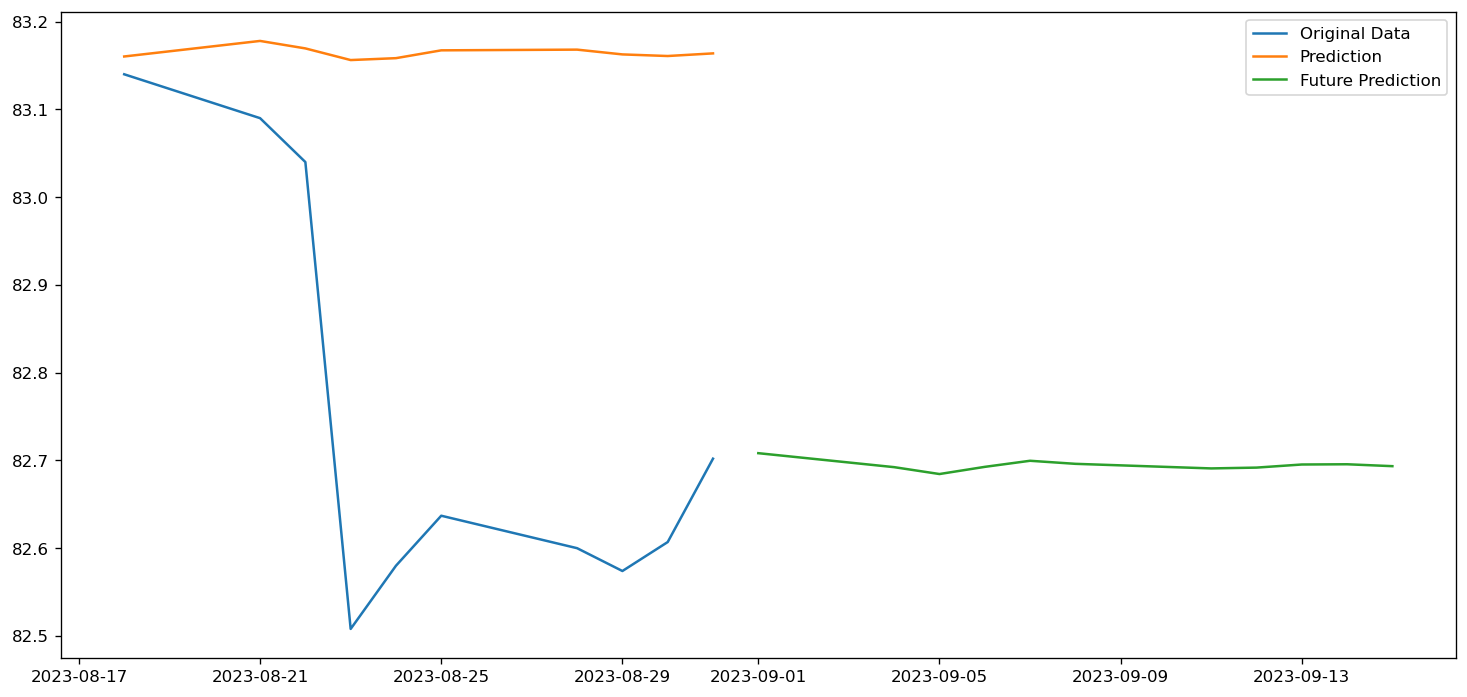

In [27]:
aug = model_fit.predict(start = len(data) - 10, end = len(data) - 1, dynamic=True)
pred_aug = model_fit.predict(start = len(data), end = len(data) + 10, dynamic=True)
plt.plot(data[name][len(data) - 10:], label = 'Original Data')
plt.plot(aug, label = 'Prediction')
plt.plot(pred_aug, label = 'Future Prediction')
plt.legend()
plt.show()

In [28]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,  
            'corr':corr, 'minmax':minmax})

In [29]:
forecast_accuracy(aug, data[name][len(data) - 10:])

{'mape': 0.005043431129565996,
 'me': 0.4167016676482973,
 'mae': 0.4167016676482973,
 'mpe': 0.005043431129565996,
 'rmse': 0.47434585878886215,
 'corr': 0.5349747820690437,
 'minmax': 0.005010674054165776}

In [30]:
size = int(len(data)*0.95) #0.67
train, test = data[name][0:size], data[name][size:len(data)]

print('\t ARIMA MODEL : In- Sample Forecasting \n')

history = [x for x in train]
predictions = []

for t in progress_bar(range(len(test))):
    
    model = ARIMA(history, order=(2,1,2))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    
    obs = test[t]
    history.append(obs)
    
    if t%50 == 0:
        print('predicted = %f, expected = %f' % (yhat, obs))

	 ARIMA MODEL : In- Sample Forecasting 



predicted = 82.234458, expected = 82.192000


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 82.904569, expected = 82.985000


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 82.447040, expected = 82.355000
predicted = 81.895195, expected = 82.100000


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 82.060355, expected = 82.080000


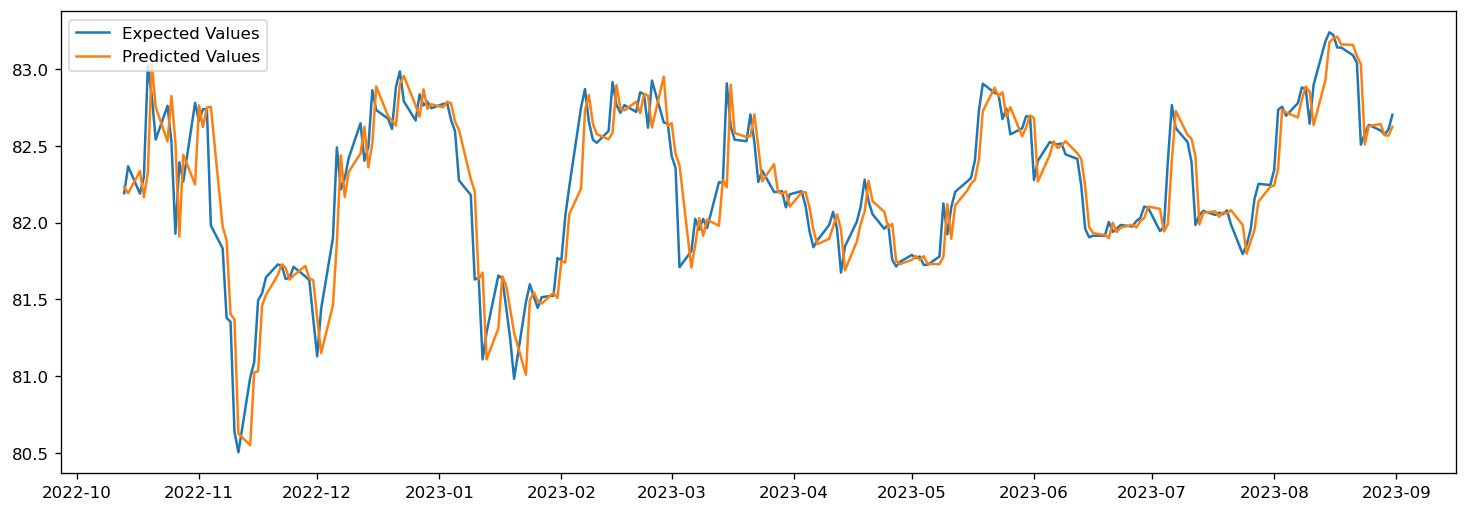

In [31]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(data[name][size:len(data)],label = 'Expected Values')
plt.plot(predictions_series,label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [32]:
forecast_accuracy(predictions_series, test)

{'mape': 0.0018111386832073291,
 'me': -0.0022206019462202515,
 'mae': 0.1488337195856528,
 'mpe': -2.327739392537971e-05,
 'rmse': 0.2165199096300756,
 'corr': 0.9069946348502408,
 'minmax': 0.001807652839878604}

In [33]:
from pandas.tseries.offsets import DateOffset

future_dates = [data.index[-1] + DateOffset(days = x) for x in range(0,15)]

df1 = pd.DataFrame(index = future_dates[1:],columns = data.columns)

forecast = pd.concat([data,df1])
forecast['ARIMA_Forecast_Function'] = np.NaN
forecast['ARIMA_Predict_Function'] = np.NaN
forecast.tail(20)

,USD,diff,ARIMA_Forecast_Function,ARIMA_Predict_Function
2023-08-24,82.580,0.072,NaN,NaN
2023-08-25,82.637,0.057,NaN,NaN
2023-08-28,82.600,-0.037,NaN,NaN
2023-08-29,82.574,-0.026,NaN,NaN
2023-08-30,82.607,0.033,NaN,NaN
2023-08-31,82.702,0.095,NaN,NaN
2023-09-01,NaN,NaN,NaN,NaN
2023-09-02,NaN,NaN,NaN,NaN
2023-09-03,NaN,NaN,NaN,NaN
2023-09-04,NaN,NaN,NaN,NaN


In [34]:
ARIMA_history_f = [x for x in train]
f1 = []

for t in progress_bar(range(len(df1))):
    
    model = ARIMA(ARIMA_history_f, order = (2,1,2))
    model_fit = model.fit()
    
    output = model_fit.forecast()[0]
    
    ARIMA_history_f.append(output)
    f1.append(output)
    
for i in range(len(f1)):
    forecast.iloc[len(data) + i,2] = f1[i]
forecast.tail(20)

,USD,diff,ARIMA_Forecast_Function,ARIMA_Predict_Function
2023-08-24,82.580,0.072,NaN,NaN
2023-08-25,82.637,0.057,NaN,NaN
2023-08-28,82.600,-0.037,NaN,NaN
2023-08-29,82.574,-0.026,NaN,NaN
2023-08-30,82.607,0.033,NaN,NaN
2023-08-31,82.702,0.095,NaN,NaN
2023-09-01,NaN,NaN,82.234458,NaN
2023-09-02,NaN,NaN,82.235113,NaN
2023-09-03,NaN,NaN,82.199255,NaN
2023-09-04,NaN,NaN,82.189774,NaN


<Axes: >

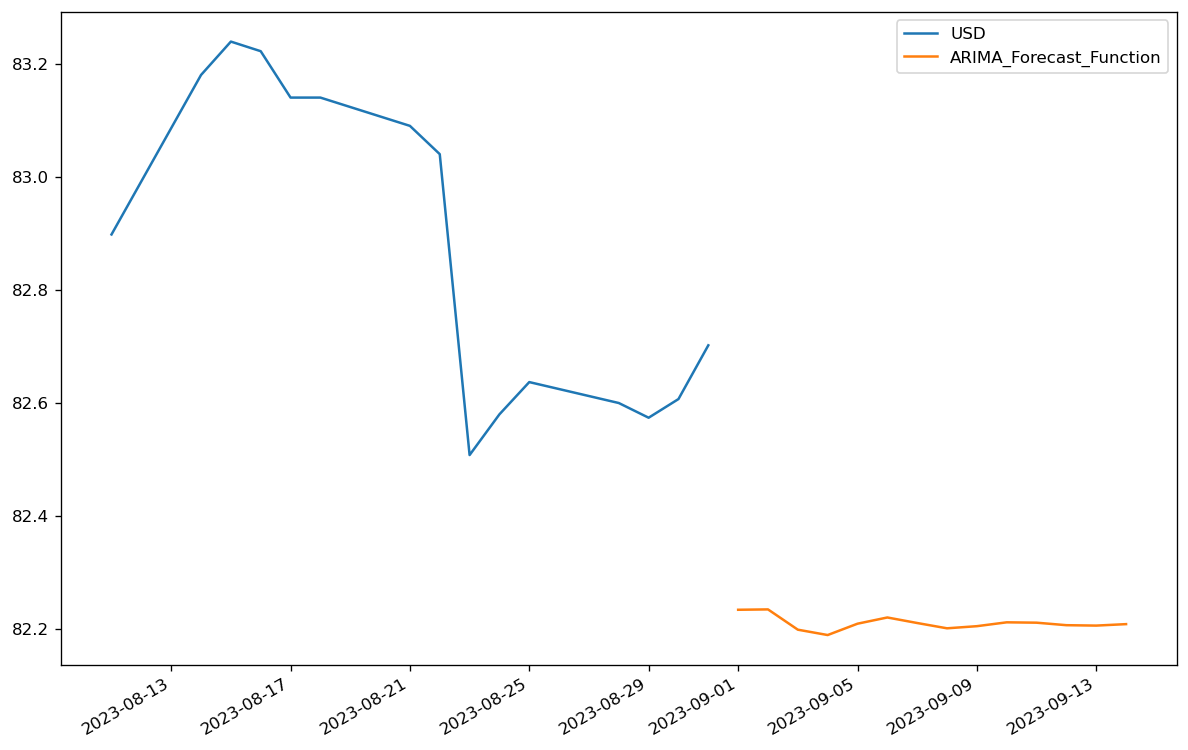

In [35]:
forecast[[name,'ARIMA_Forecast_Function']][len(data) - 15:].plot(figsize = (12,8))

In [36]:
ARIMA_history_p = [x for x in train]
f2 = []

for t in progress_bar(range(len(df1))):
    
    model = ARIMA(ARIMA_history_p, order = (2,1,2))
    model_fit = model.fit()
    
    output = model_fit.predict(start = len(ARIMA_history_p),end = len(ARIMA_history_p),typ = 'levels')[0]
    
    ARIMA_history_p.append(output)
    f2.append(output)
    
for i in range(len(f2)):
    forecast.iloc[len(data) + i,3] = f2[i]
forecast.tail(20)

,USD,diff,ARIMA_Forecast_Function,ARIMA_Predict_Function
2023-08-24,82.580,0.072,NaN,NaN
2023-08-25,82.637,0.057,NaN,NaN
2023-08-28,82.600,-0.037,NaN,NaN
2023-08-29,82.574,-0.026,NaN,NaN
2023-08-30,82.607,0.033,NaN,NaN
2023-08-31,82.702,0.095,NaN,NaN
2023-09-01,NaN,NaN,82.234458,82.234458
2023-09-02,NaN,NaN,82.235113,82.235113
2023-09-03,NaN,NaN,82.199255,82.199255
2023-09-04,NaN,NaN,82.189774,82.189774


<Axes: >

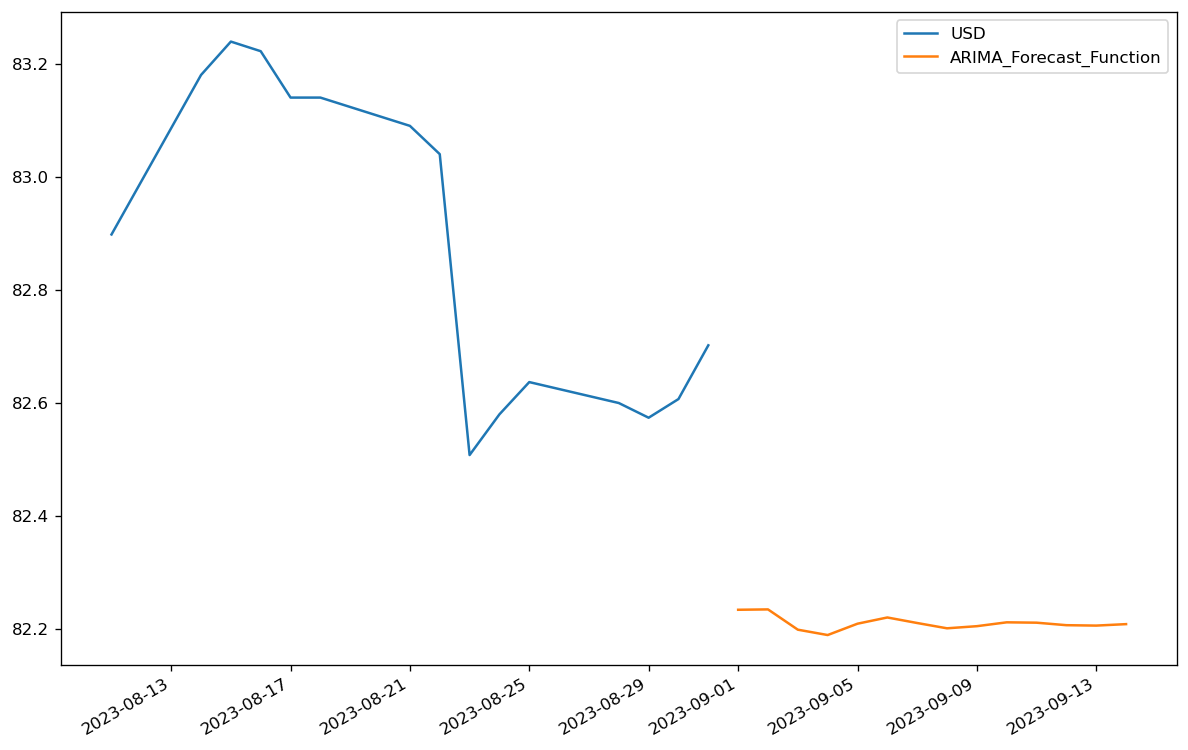

In [37]:
forecast[[name,'ARIMA_Forecast_Function']][len(data) - 15:].plot(figsize = (12,8))

<Axes: >

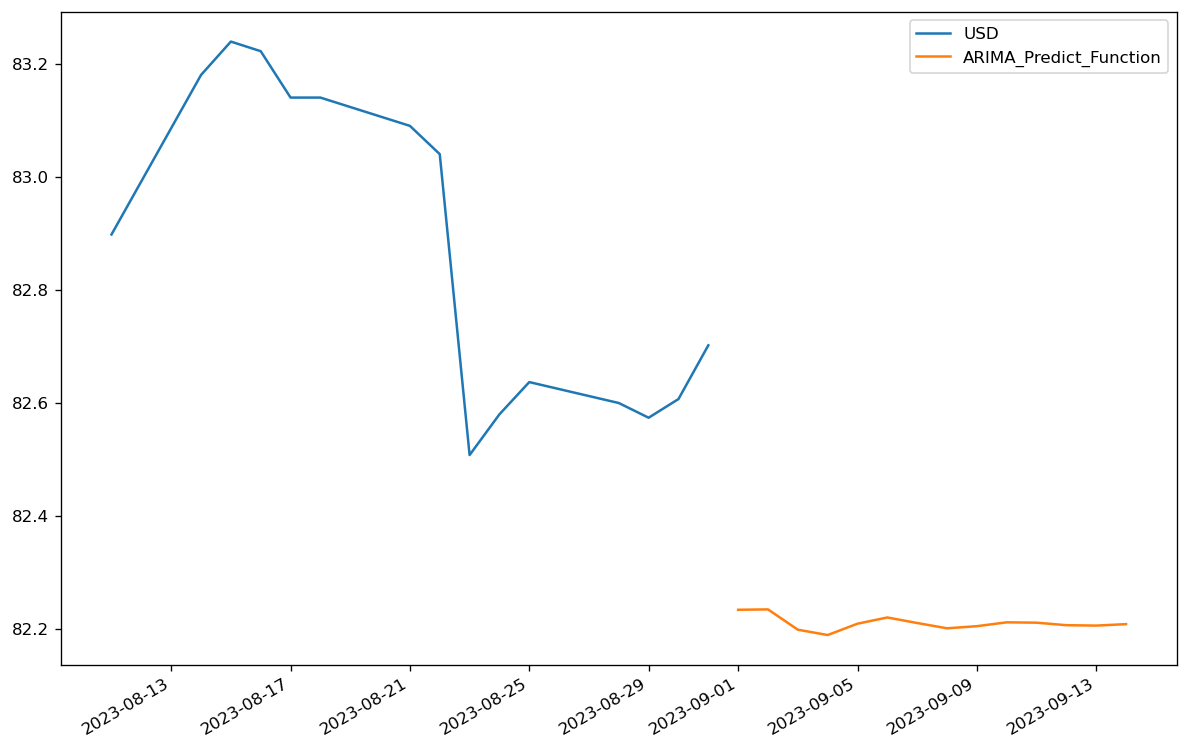

In [38]:
forecast[[name,'ARIMA_Predict_Function']][len(data) - 15:].plot(figsize = (12,8))

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = df.copy()

for col in df.columns:
    df_norm[col] = scaler.fit_transform(df_norm[col].values.reshape(-1,1))

df_norm.tail()


,USD,AUS,CAN,SWF,DKK,EUR,GBP,HKD,IDR,JPY,...,ILS,ISK,MXN,PHP,PKR,PLN,RUB,SAR,TRY,BHD
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-25,0.986369,0.726483,0.833634,0.963727,0.924157,0.922071,0.910410,0.979239,0.001986,0.777478,...,0.772977,0.869333,0.889876,0.833390,0.002522,0.833142,0.215222,0.986395,0.002310,0.986453
2023-08-28,0.985531,0.733331,0.833907,0.964568,0.928087,0.924721,0.914360,0.977855,0.002018,0.776541,...,0.772977,0.873333,0.884136,0.828157,0.002270,0.836594,0.217961,0.985544,0.002599,0.985666
2023-08-29,0.984942,0.745601,0.839967,0.973208,0.940029,0.937338,0.921156,0.977074,0.002030,0.779828,...,0.780047,0.887000,0.882979,0.825287,0.001261,0.850403,0.212287,0.984694,0.002310,0.985076
2023-08-30,0.985690,0.745759,0.844019,0.974302,0.949949,0.948365,0.936911,0.977571,0.002042,0.778103,...,0.780833,0.890333,0.890848,0.825456,0.001429,0.858458,0.208244,0.985544,0.001733,0.985820
2023-08-31,0.987841,0.749532,0.850114,0.967231,0.936042,0.932912,0.930985,0.981138,0.002028,0.782821,...,0.775334,0.883333,0.852567,0.834234,0.000000,0.841197,0.210657,0.988095,0.001733,0.988121


In [40]:
data = pd.DataFrame(df_norm[name])
data

,USD
Date,
2006-01-02,0.135857
2006-01-03,0.133367
2006-01-04,0.127479
2006-01-05,0.125102
2006-01-06,0.118762
...,...
2023-08-25,0.986369
2023-08-28,0.985531
2023-08-29,0.984942


In [41]:
def sliding_windows(data, seq_length):
    x = []
    y = []
    data = np.array(data)
    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

In [42]:
seq_length = 15
x, y = sliding_windows(data, seq_length)
print(x.shape)
print(y.shape)

(4593, 15, 1)
(4593, 1)


In [43]:
#train_size = int(len(y) * 0.67)
#test_size = len(y) - train_size

train_size = int(len(df) - seq_length*0.3)
test_size =  len(df) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

In [44]:
print("train shape is:",trainX.size())
print("train label shape is:",trainY.size())
print("test shape is:",testX.size())
print("test label shape is:",testY.size())

train shape is: torch.Size([4593, 15, 1])
train label shape is: torch.Size([4593, 1])
test shape is: torch.Size([0, 15, 1])
test label shape is: torch.Size([0, 1])


In [45]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [46]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        #self.seq_length = seq_length
        self.dropout = nn.Dropout(p=0.2)

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True,dropout = 0.25)

        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size).to(device))

        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size).to(device))

        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))

        h_out = h_out.view(-1, self.hidden_size)

        out = self.fc(h_out)
        out = self.dropout(out)

        return out

In [47]:
num_epochs = 500
learning_rate = 1e-3
input_size = 1
hidden_size = 512
num_layers = 1
num_classes = 1

In [48]:
model = LSTM(num_classes, input_size, hidden_size, num_layers)
model.to(device)

criterion = torch.nn.MSELoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = 1e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       patience=100, factor =0.5 ,min_lr=1e-7, eps=1e-08)

In [49]:
for epoch in progress_bar(range(num_epochs)):
    model.train()
    outputs = model(trainX.to(device))
    optimizer.zero_grad()
    # obtain the loss function
    loss = criterion(outputs, trainY.to(device))

    loss.backward()

    scheduler.step(loss)
    optimizer.step()
    model.eval()
    with torch.no_grad():
        valid = model(testX.to(device))
        vall_loss = criterion(valid, testY.to(device))
        scheduler.step(vall_loss)
        torch.cuda.empty_cache()

    if (epoch) % 50 == 0:
        print("Epoch: %d, loss: %1.5f valid loss:  %1.5f " %(epoch, loss.cpu().item(),vall_loss.cpu().item()))

Epoch: 0, loss: 0.35364 valid loss:  nan 
Epoch: 50, loss: 0.06213 valid loss:  nan 
Epoch: 100, loss: 0.06229 valid loss:  nan 
Epoch: 150, loss: 0.06210 valid loss:  nan 
Epoch: 200, loss: 0.05970 valid loss:  nan 
Epoch: 250, loss: 0.06125 valid loss:  nan 
Epoch: 300, loss: 0.06442 valid loss:  nan 
Epoch: 350, loss: 0.06149 valid loss:  nan 
Epoch: 400, loss: 0.06346 valid loss:  nan 
Epoch: 450, loss: 0.06146 valid loss:  nan 


In [50]:
model.eval()
with torch.no_grad():
    train_predict = model(dataX.to(device))
    data_predict = train_predict.cpu().data.numpy()
    dataY_plot = dataY.data.numpy()

    data_predict = scaler.inverse_transform(data_predict)
    dataY_plot = scaler.inverse_transform(dataY_plot)

    df_predict = pd.DataFrame(data_predict)
    df_labels = pd.DataFrame(dataY_plot)
    torch.cuda.empty_cache()

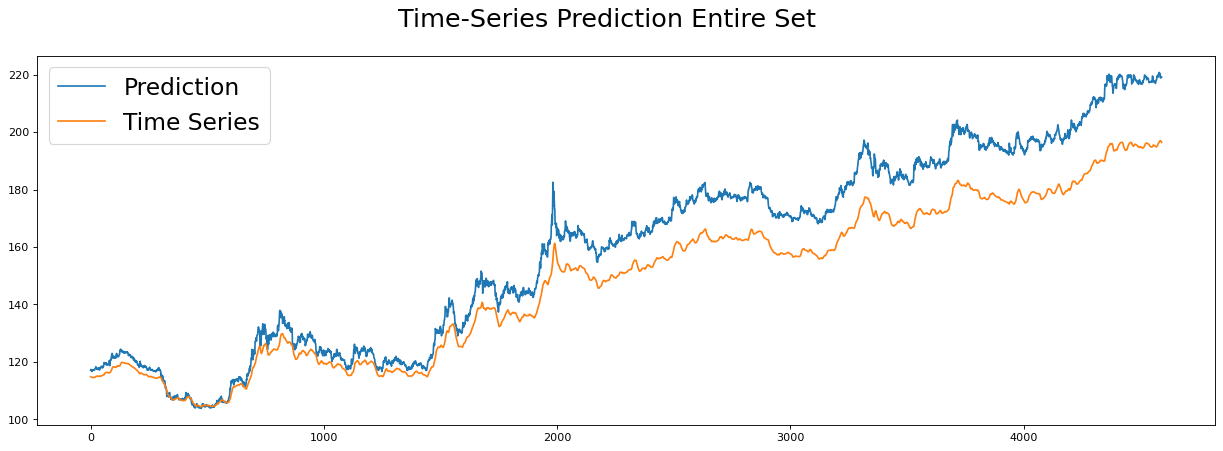

In [51]:
plt.figure(num=None, figsize=(19, 6), dpi=80)
plt.plot(df_labels[0])
plt.plot(df_predict[0])
plt.suptitle('Time-Series Prediction Entire Set',fontsize = 23)
plt.legend(['Prediction','Time Series'],fontsize = 21)
plt.show()

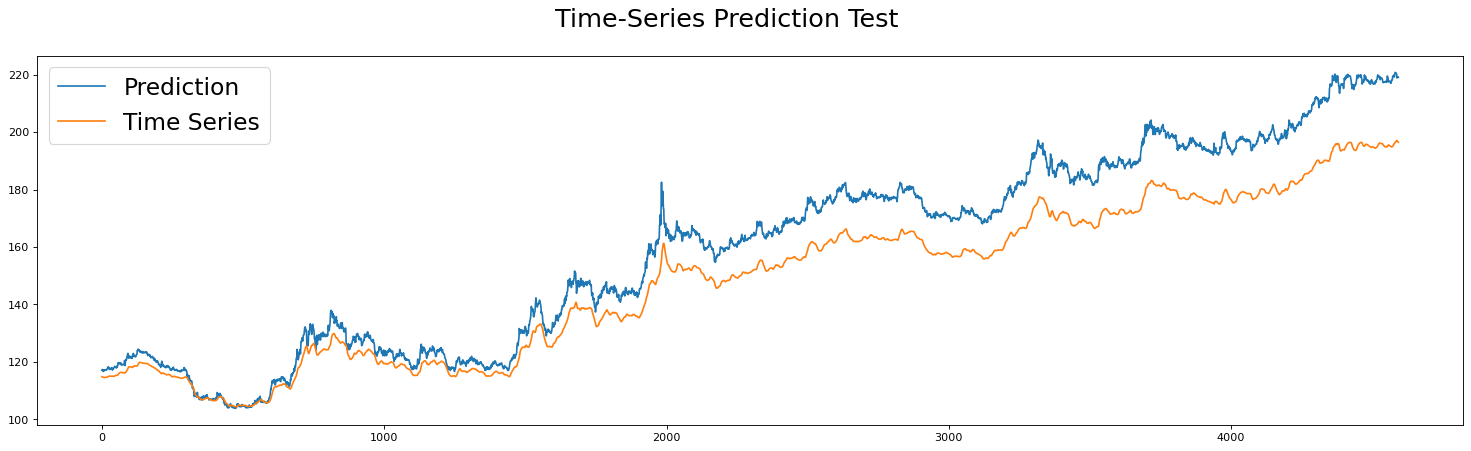

In [52]:
plt.figure(num=None, figsize=(23, 6), dpi=80)
plt.plot(df_labels.iloc[-testX.size()[0]:][0])
plt.plot(df_predict.iloc[-testX.size()[0]:][0])
plt.suptitle('Time-Series Prediction Test',fontsize = 23)
plt.legend(['Prediction','Time Series'],fontsize = 21)
plt.show()

In [53]:
np.sqrt(((dataY_plot[-testX.size()[0]:] - data_predict[-testX.size()[0]:] ) ** 2).mean())

13.035385

In [54]:
train_data = torch.FloatTensor(x).unsqueeze(1).to(device)
test_data = torch.FloatTensor(y).unsqueeze(1).to(device)

In [55]:
num_predictions = 15

model.eval()
inputs = torch.tensor(test_data[-input_size:].reshape(1, input_size, 1), dtype=torch.float32).to(device)

predictions1 = []
with torch.no_grad():
    for i in range(num_predictions):
        # Forward pass
        outputs = model(inputs.to(device))

        # Save the prediction
        predictions1.append(outputs.item())

        # Update the input sequence for the next time step
        inputs = torch.cat((inputs[:, 1:, :], outputs.reshape(1, 1, 1)), axis=1)
        
        torch.cuda.empty_cache()

# Print the predicted sequence
print('Predicted Sequence:', predictions1)

Predicted Sequence: [0.10142596065998077, 0.03199705481529236, 0.026634663343429565, 0.02622106298804283, 0.026189163327217102, 0.026186704635620117, 0.026186518371105194, 0.026186503469944, 0.026186499744653702, 0.026186499744653702, 0.026186499744653702, 0.026186499744653702, 0.026186499744653702, 0.026186499744653702, 0.026186499744653702]


In [56]:
def rev_min_max_func(scaled_val):
    max_val = max(df[name])
    min_val = min(df[name])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val

pred1 = pd.Series(predictions1).apply(lambda x: rev_min_max_func(x))
pred1

0     43.554376
1     40.488118
2     40.251293
3     40.233027
4     40.231618
5     40.231510
6     40.231501
7     40.231501
8     40.231501
9     40.231501
10    40.231501
11    40.231501
12    40.231501
13    40.231501
14    40.231501
dtype: float64

In [57]:
forecast['Single LSTM'] = np.NaN

for i in range(len(pred1)):
    forecast.loc[len(data) - i,'Single LSTM'] = pred1[i]
forecast.tail(20)
#pred1

,USD,diff,ARIMA_Forecast_Function,ARIMA_Predict_Function,Single LSTM
2023-09-10 00:00:00,NaN,NaN,82.212264,82.212264,NaN
2023-09-11 00:00:00,NaN,NaN,82.211632,82.211632,NaN
2023-09-12 00:00:00,NaN,NaN,82.207201,82.207201,NaN
2023-09-13 00:00:00,NaN,NaN,82.206477,82.206477,NaN
2023-09-14 00:00:00,NaN,NaN,82.209070,82.209070,NaN
4609,NaN,NaN,NaN,NaN,43.554376
4608,NaN,NaN,NaN,NaN,40.488118
4607,NaN,NaN,NaN,NaN,40.251293
4606,NaN,NaN,NaN,NaN,40.233027
4605,NaN,NaN,NaN,NaN,40.231618


In [58]:
torch.cuda.empty_cache()

In [59]:
class LSTM2(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM2, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.batch_size = 1
        #self.seq_length = seq_length

        self.LSTM2 = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers,batch_first=True,dropout = 0.25)

        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        h_1 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size).to(device))

        c_1 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size).to(device))

        _, (hn, cn) = self.LSTM2(x, (h_1, c_1))

        #print("hidden state shpe is:",hn.size())
        y = hn.view(-1, self.hidden_size)

        final_state = hn.view(self.num_layers, x.size(0), self.hidden_size)[-1]
        #print("final state shape is:",final_state.shape)
        out = self.fc(final_state)
        #out = self.dropout(out)
        #print(out.size())
        return out

In [60]:
def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.uniform_(param.data, -0.08, 0.08)

In [61]:
num_epochs = 700
learning_rate = 1e-3
input_size = 1
hidden_size = 512
num_layers = 2
num_classes = 1

In [62]:
lstm = LSTM2(num_classes, input_size, hidden_size, num_layers)
lstm.to(device)

lstm.apply(init_weights)

criterion = torch.nn.MSELoss().to(device)    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate,weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,  patience=100, factor =0.5 ,min_lr=1e-7, eps=1e-08)

In [63]:
for epoch in progress_bar(range(num_epochs)):
    lstm.train()
    outputs = lstm(trainX.to(device))
    optimizer.zero_grad()
    # obtain the loss function
    loss = criterion(outputs, trainY.to(device))

    loss.backward()

    scheduler.step(loss)
    optimizer.step()
    lstm.eval()
    
    with torch.no_grad():
        valid = lstm(testX.to(device))
        vall_loss = criterion(valid, testY.to(device))
        scheduler.step(vall_loss)
        torch.cuda.empty_cache()

    if (epoch) % 50 == 0:
        print("Epoch: %d, Train Loss: %1.5f, Valid Loss: %1.5f" %(epoch, loss, vall_loss))

Epoch: 0, Train Loss: 0.33598, Valid Loss: nan
Epoch: 50, Train Loss: 0.00038, Valid Loss: nan
Epoch: 100, Train Loss: 0.00024, Valid Loss: nan
Epoch: 150, Train Loss: 0.00022, Valid Loss: nan
Epoch: 200, Train Loss: 0.00021, Valid Loss: nan
Epoch: 250, Train Loss: 0.00020, Valid Loss: nan
Epoch: 300, Train Loss: 0.00019, Valid Loss: nan
Epoch: 350, Train Loss: 0.00018, Valid Loss: nan
Epoch: 400, Train Loss: 0.00017, Valid Loss: nan
Epoch: 450, Train Loss: 0.00017, Valid Loss: nan
Epoch: 500, Train Loss: 0.00016, Valid Loss: nan
Epoch: 550, Train Loss: 0.00016, Valid Loss: nan
Epoch: 600, Train Loss: 0.00016, Valid Loss: nan
Epoch: 650, Train Loss: 0.00015, Valid Loss: nan


In [64]:
lstm.eval()
with torch.no_grad():
    train_predict = lstm(dataX.to(device))
    data_predict = train_predict.cpu().data.numpy()
    dataY_plot = dataY.data.numpy()

    data_predict = scaler.inverse_transform(data_predict)
    dataY_plot = scaler.inverse_transform(dataY_plot)

    df_predict = pd.DataFrame(data_predict)
    df_labels = pd.DataFrame(dataY_plot)

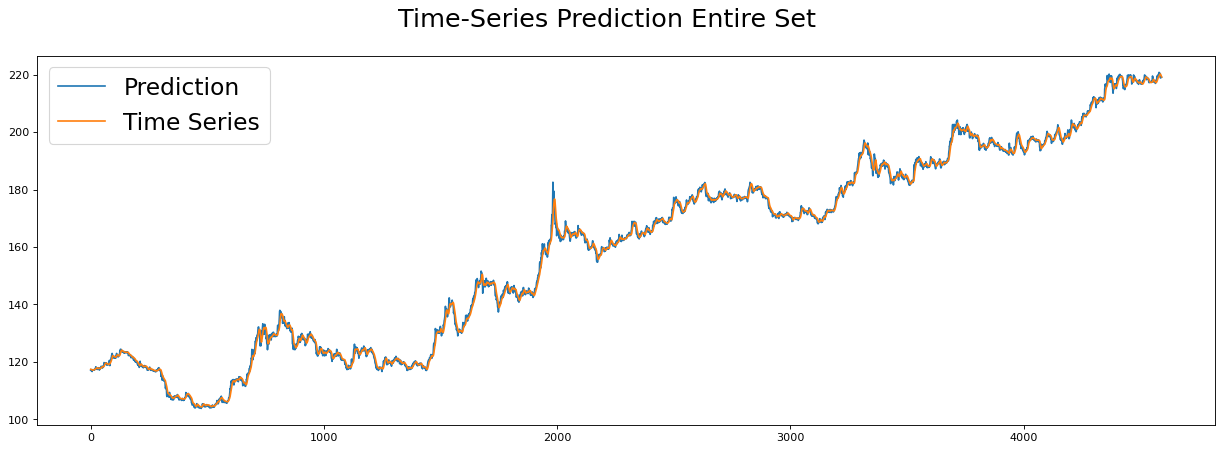

In [65]:
plt.figure(num=None, figsize=(19, 6), dpi=80)
plt.plot(df_labels[0])
plt.plot(df_predict[0])
plt.suptitle('Time-Series Prediction Entire Set',fontsize = 23)
plt.legend(['Prediction','Time Series'],fontsize = 21)
plt.show()

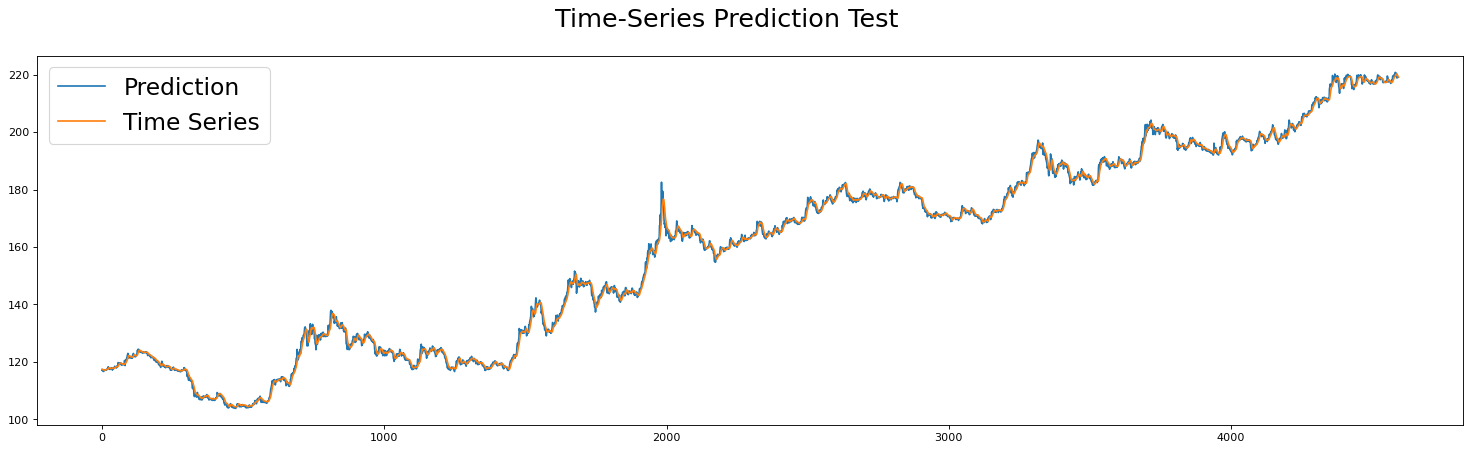

In [66]:
plt.figure(num=None, figsize=(23, 6), dpi=80)
plt.plot(df_labels.iloc[-testX.size()[0]:][0])
plt.plot(df_predict.iloc[-testX.size()[0]:][0])
plt.suptitle('Time-Series Prediction Test',fontsize = 23)
plt.legend(['Prediction','Time Series'],fontsize = 21)
plt.show()

In [67]:
np.sqrt(((dataY_plot[-testX.size()[0]:] - data_predict[-testX.size()[0]:] ) ** 2).mean())

1.1617279

In [68]:
num_predictions = 15

lstm.eval()
inputs = torch.tensor(test_data[-input_size:].reshape(1, input_size, 1), dtype=torch.float32).to(device)

predictions2 = []
with torch.no_grad():
    for i in range(num_predictions):
        # Forward pass
        outputs = lstm(inputs.to(device))

        # Save the prediction
        predictions2.append(outputs.item())

        # Update the input sequence for the next time step
        inputs = torch.cat((inputs[:, 1:, :], outputs.reshape(1, 1, 1)), axis=1)
        
        torch.cuda.empty_cache()

# Print the predicted sequence
print('Predicted Sequence:', predictions2)

Predicted Sequence: [0.1162668913602829, 0.02691018581390381, 0.017768576741218567, 0.01683400571346283, 0.01673845946788788, 0.016728699207305908, 0.01672770082950592, 0.016727596521377563, 0.01672758162021637, 0.01672758162021637, 0.01672758162021637, 0.01672758162021637, 0.01672758162021637, 0.01672758162021637, 0.01672758162021637]


In [69]:
def rev_min_max_func(scaled_val):
    max_val = max(df[name])
    min_val = min(df[name])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val

pred2 = pd.Series(predictions2).apply(lambda x: rev_min_max_func(x))
pred2

0     44.209811
1     40.263461
2     39.859731
3     39.818457
4     39.814237
5     39.813806
6     39.813762
7     39.813758
8     39.813757
9     39.813757
10    39.813757
11    39.813757
12    39.813757
13    39.813757
14    39.813757
dtype: float64

In [70]:
forecast['Multiple LSTM'] = np.NaN

for i in range(len(pred2)):
    forecast.loc[len(data) - i,'Multiple LSTM'] = pred2[i]
forecast.tail(20)

,USD,diff,ARIMA_Forecast_Function,ARIMA_Predict_Function,Single LSTM,Multiple LSTM
2023-09-10 00:00:00,NaN,NaN,82.212264,82.212264,NaN,NaN
2023-09-11 00:00:00,NaN,NaN,82.211632,82.211632,NaN,NaN
2023-09-12 00:00:00,NaN,NaN,82.207201,82.207201,NaN,NaN
2023-09-13 00:00:00,NaN,NaN,82.206477,82.206477,NaN,NaN
2023-09-14 00:00:00,NaN,NaN,82.209070,82.209070,NaN,NaN
4609,NaN,NaN,NaN,NaN,43.554376,44.209811
4608,NaN,NaN,NaN,NaN,40.488118,40.263461
4607,NaN,NaN,NaN,NaN,40.251293,39.859731
4606,NaN,NaN,NaN,NaN,40.233027,39.818457
4605,NaN,NaN,NaN,NaN,40.231618,39.814237
